# Google trends analysis

### Objective
> #### Design a full stack application for Google trends of keywords using the data collected from API 

### Steps
1. Import libraries
2. Pilot with API
3. Emulation of charts from Client template
4. Design of functions
5. Overcome limitations on number of keywords
6. Design output layer using Dash/dasboard tool

### References
#### Pytrends
1. https://medium.com/intro-to-python-wows/google-trends-4db836214868

#### Handling more than 5+ keywords
1. https://medium.com/analytics-vidhya/google-pytrends-a-python-library-for-google-trends-search-for-more-than-5-keywords-bcf01cfd0064
2. https://digitaljobstobedone.com/2017/07/10/how-do-you-compare-large-numbers-of-items-in-google-trends/

#### Front end
1. Flask google trends - https://github.com/phfilly/python-googlesearch-api
2. Flask bokeh plot - https://github.com/veit/flask-bokeh-dashboard
3. Flask wtf forms app - https://hackersandslackers.com/flask-wtforms-forms/
4. Food fight - https://github.com/bartleyg/foodfight

## 1. Import Libraries

In [121]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from pytrends.request import TrendReq

## 2. Pilot with API 

### Pytrends

#### References: https://github.com/GeneralMills/pytrends

### With single keyword

In [122]:
# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq(geo='IN')

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
pytrend.build_payload(kw_list=['coconut milk'],cat=71)
#pytrend.build_payload(kw_list=['coconut milk'],cat=45)
#pytrend.build_payload(kw_list=['coconut milk','almond milk','soy milk','rice milk'])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.head())

# Interest by Region
interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY')
print(interest_by_region_df.head())

# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()
print(related_queries_dict)


            coconut milk isPartial
date                              
2015-06-07            70     False
2015-06-14            65     False
2015-06-21            54     False
2015-06-28            44     False
2015-07-05            51     False
                             coconut milk
geoName                                  
Andaman and Nicobar Islands             0
Andhra Pradesh                         19
Arunachal Pradesh                       0
Assam                                  13
Bihar                                   3
{'coconut milk': {'top':                               query  value
0               coconut milk recipe    100
1                 coconut milk rice     54
2                      coconut rice     53
3          recipe with coconut milk     40
4              coconut milk recipes     40
5               coconut milk powder     36
6          how to make coconut milk     35
7         chicken with coconut milk     19
8         recipes with coconut milk     18
9     

### With many keywords

In [123]:
# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq(geo='IN')

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
pytrend.build_payload(kw_list=['coconut milk','almond milk','soy milk','rice milk'])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.head())

# Interest by Region
interest_by_region_df = pytrend.interest_by_region()
print(interest_by_region_df.head())

# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()
print(related_queries_dict)


            coconut milk  almond milk  soy milk  rice milk isPartial
date                                                                
2015-06-07            63           14        15         18     False
2015-06-14            64           23        17         15     False
2015-06-21            62           11        10         22     False
2015-06-28            53           12        16         22     False
2015-07-05            68           23        21         26     False
                             coconut milk  almond milk  soy milk  rice milk
geoName                                                                    
Andaman and Nicobar Islands             0            0         0          0
Andhra Pradesh                         41           20        12         27
Arunachal Pradesh                       0            0         0          0
Assam                                  39           19        11         31
Bihar                                  33           24       

### Access from dictionary "related_queries_dict"

In [124]:
related_queries_dict['coconut milk']['top'].head(5)

,query,value
0,coconut milk recipe,100
1,coconut milk for hair,64
2,how to make coconut milk,55
3,coconut milk rice,53
4,coconut oil,52


In [125]:
related_queries_dict['coconut milk']['rising'].head(5)

,query,value
0,wow coconut milk shampoo,84850
1,wow shampoo,79650
2,ogx shampoo,50400
3,ogx coconut milk shampoo,49050
4,coconut milk near me,38200


## 3. Emulation of charts from client template

In [126]:
pytrend.build_payload(kw_list=['coconut milk'],cat=45,timeframe='2018-04-15 2020-05-03')

### Interest Over Region

In [127]:
# Interest by Region
interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY').reset_index()
interest_by_region_df.head()

,geoName,coconut milk
0,Andaman and Nicobar Islands,0
1,Andhra Pradesh,16
2,Arunachal Pradesh,0
3,Assam,8
4,Bihar,2


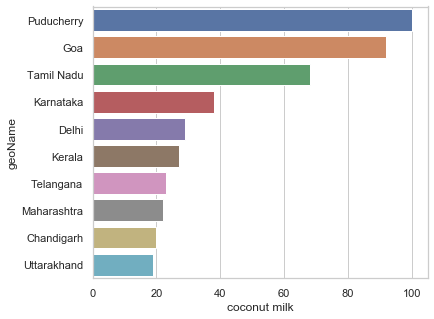

In [128]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Sort
interest_by_region_df = interest_by_region_df.sort_values("coconut milk", ascending=False).head(10)

# Plot
sns.set_color_codes("pastel")
sns.barplot(x="coconut milk", y="geoName", data=interest_by_region_df)

### Top related queries 

In [129]:
# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()
top_related_queries_dict = related_queries_dict['coconut milk']['top']

In [130]:
top_related_queries_dict.head()

,query,value
0,coconut milk benefits,100
1,benefits of coconut milk,59
2,coconut milk nutrition,31
3,coconut milk calories,28
4,coconut milk nutrition facts,12


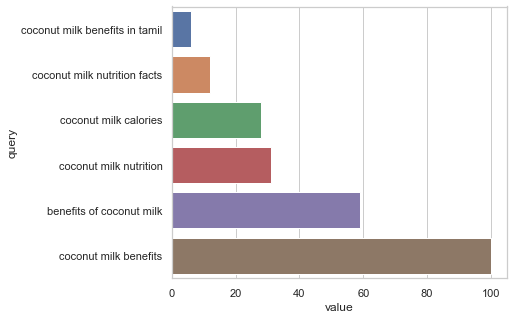

In [131]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Sort
top_related_queries_dict = top_related_queries_dict.sort_values("value", ascending=True).head(10)

# Plot
sns.set_color_codes("pastel")
sns.barplot(x="value", y="query", data=top_related_queries_dict)

### Interest over time

In [132]:
# Interest Over Time
interest_over_time_df = pytrend.interest_over_time().reset_index()
interest_over_time_df.head()

,date,coconut milk,isPartial
0,2018-04-15,79,False
1,2018-04-22,51,False
2,2018-04-29,54,False
3,2018-05-06,57,False
4,2018-05-13,58,False


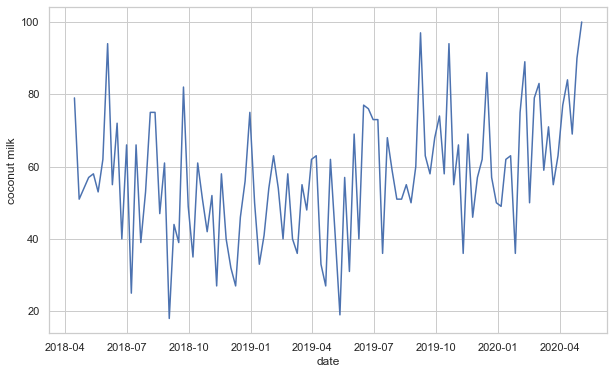

In [133]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x="date", y="coconut milk", data=interest_over_time_df)

### Interest over time - Types of Milk
#### Health

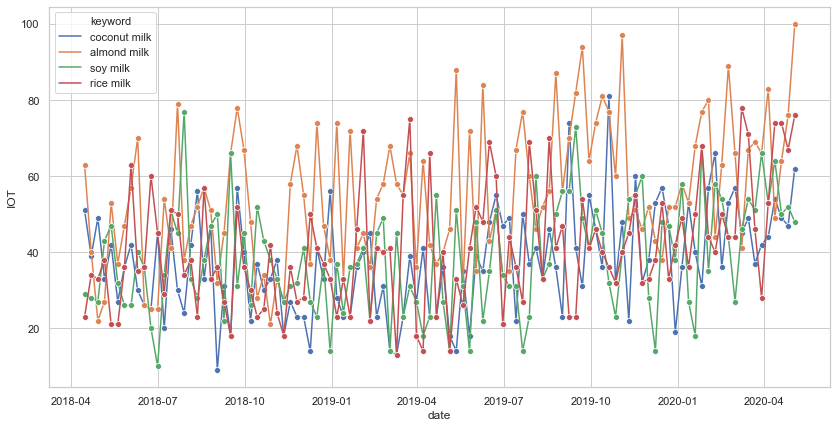

In [134]:
# Health
pytrend.build_payload(kw_list=['coconut milk','almond milk','soy milk','rice milk'],cat=45,timeframe='2018-04-15 2020-05-03')
interest_over_time_df = pytrend.interest_over_time().reset_index()

data1=interest_over_time_df.melt(id_vars =['date'], value_vars =['coconut milk','almond milk','soy milk','rice milk'],  
        var_name ='keyword', value_name ='IOT') 
data1 = data1[pd.notnull(data1['IOT'])]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(x='date', y='IOT',hue='keyword',marker='o',data=data1)

#### Food & drink

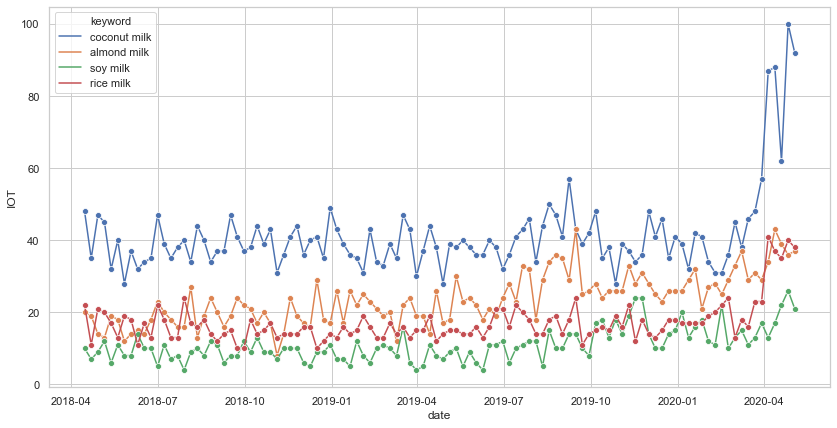

In [135]:
# Food & Drink
pytrend.build_payload(kw_list=['coconut milk','almond milk','soy milk','rice milk'],cat=71,timeframe='2018-04-15 2020-05-03')
interest_over_time_df = pytrend.interest_over_time().reset_index()

data1=interest_over_time_df.melt(id_vars =['date'], value_vars =['coconut milk','almond milk','soy milk','rice milk'],  
        var_name ='keyword', value_name ='IOT') 
data1 = data1[pd.notnull(data1['IOT'])]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(x='date', y='IOT',hue='keyword',marker='o',data=data1)

## 4. Design of functions

In [136]:
def googleTrendsApi(keywords,user_cat,user_geo,user_timeframe):
    pytrend = TrendReq()
    pytrend.build_payload(kw_list=keywords,cat=user_cat,timeframe = user_timeframe,geo = user_geo)
    
    # Interest by Region
    interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY').reset_index()
    
    # Related Queries, returns a dictionary of dataframes
    related_queries_dict = pytrend.related_queries()
    top_related_queries_dict = related_queries_dict[keywords[0]]['top']
    
    # Interest Over Time
    interest_over_time_df = pytrend.interest_over_time().reset_index()
    interest_over_time_df = interest_over_time_df.drop(['isPartial'],axis=1)
    interest_over_time_df.head()
    
    return interest_by_region_df,top_related_queries_dict,interest_over_time_df

In [137]:
IoR,TRQ,IoT = googleTrendsApi(['coconut milk'],45,'IN','2018-04-15 2020-05-03')

In [138]:
def googleTrendsCharts(IoR,TRQ,IoT):
    IoR.rename(columns={ IoR.columns[1]: 'keyword' }, inplace = True)
    IoT.rename(columns={ IoT.columns[1]: 'keyword' }, inplace = True)
    
    # Initialize the matplotlib figure
    f, axs = plt.subplots(3,1,figsize=(12, 16))
    
    # Sort
    IoR = IoR.sort_values("keyword", ascending=False).head(10)
    TRQ = TRQ.sort_values("value", ascending=False).head(10)

    # Plot
    sns.set_color_codes("pastel")
    sns.barplot(x="keyword", y="geoName", ax=axs[0], data=IoR).set(title = 'Interest over Region', xlabel = 'Value', ylabel = 'Region' )
    sns.barplot(x="value", y="query", ax=axs[1], data=TRQ).set(title = 'Top related queries', xlabel = 'Value', ylabel = 'Query' )
    sns.lineplot(x="date", y="keyword", ax=axs[2], data=IoT).set(title = 'Interest over Time', xlabel = 'Time', ylabel = 'Value' )

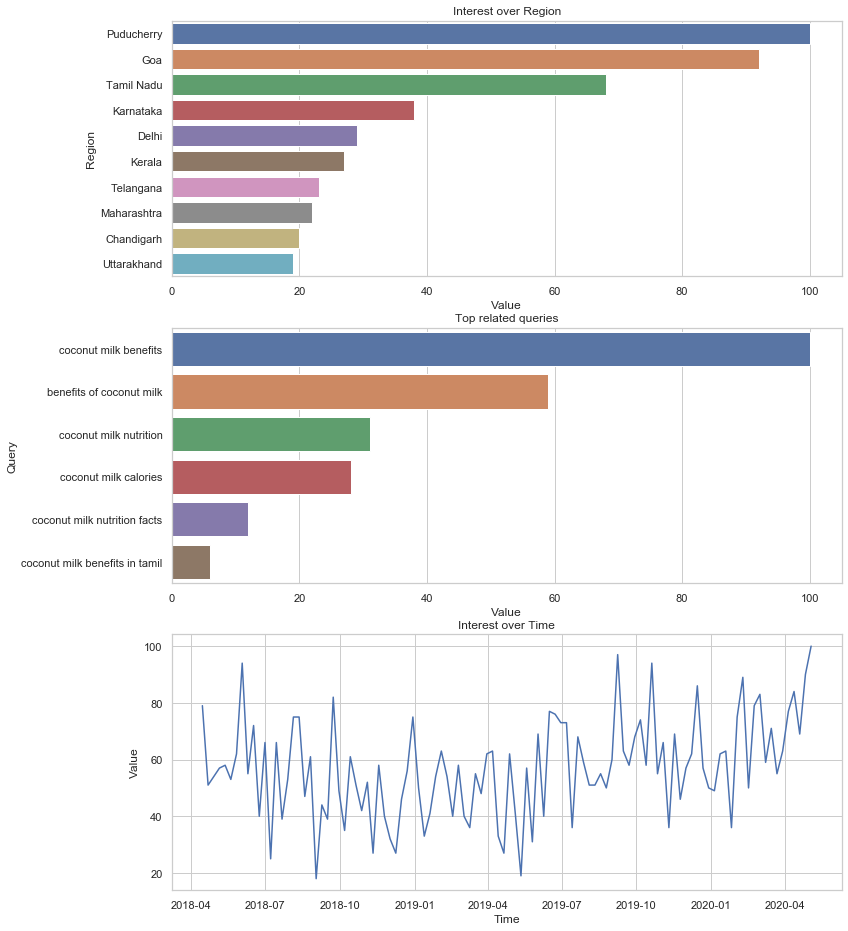

In [139]:
googleTrendsCharts(IoR,TRQ,IoT)

## 5. Overcome limitations on number of keywords
### Handling 5+ keywords on IoT plot

#### Two set input

In [140]:
# Function Google trends data Api
def googleTrendsApi_IoT(keywords,user_cat,user_geo,user_timeframe):
    pytrend = TrendReq()
    pytrend.build_payload(kw_list=keywords,cat=user_cat,timeframe = user_timeframe,geo = user_geo)
        
    # Interest Over Time
    interest_over_time_df = pytrend.interest_over_time().reset_index()
    interest_over_time_df = interest_over_time_df.drop(['isPartial'],axis=1)
    interest_over_time_df.head()
    
    return interest_over_time_df

In [141]:
# Function to plot IoT
def googleTrendsCharts_IoT(IoT,kwlist):
    data1=IoT.melt(id_vars =['date'], value_vars = kwlist,  
    var_name ='keyword', value_name ='IOT') 
    data1 = data1[pd.notnull(data1['IOT'])]
    
    # Initialize the matplotlib figure
    f, axs = plt.subplots(figsize=(16, 9))
    
    # Plot
    sns.set_color_codes("pastel")
    sns.lineplot(x="date", y="IOT", hue='keyword',marker='o',data=data1).set(title = 'Interest over Time', xlabel = 'Time', ylabel = 'Value' )

In [142]:
kwlist1 = ['Coconut milk','Almond milk','Rice milk','Soy milk','Oat milk']
kwlist2 = ['Almond milk','Cashew milk','Pea milk','Flax milk','Hemp milk']
category = 45
geo_location = 'IN'
time_frame = 'today 12-m'

In [143]:
kwlist1 = ['coconut milk','almond milk','rice milk','soy milk','oat milk']
kwlist2 = ['almond milk','cashew milk','pea milk','flax milk','hemp milk']
category = 45
geo_location = 'IN'
time_frame = 'today 12-m'

In [144]:
def IoT_plot(kwlist1,kwlist2,category,geo_location,time_frame):
    IoT1 = googleTrendsApi_IoT(kwlist1,category,geo_location,time_frame)
    IoT2 = googleTrendsApi_IoT(kwlist2,category,geo_location,time_frame)
#    IoT3 = googleTrendsApi_IoT(kwlist3,category,geo_location,time_frame)
    df_IoT = pd.merge(IoT1,IoT2)
    merged_kwlist = kwlist1+kwlist2
    print(IoT1.head())
    print(IoT2.head())
#    print(IoT3.head())
    %time googleTrendsCharts_IoT(df_IoT,merged_kwlist)

        date  coconut milk  almond milk  rice milk  soy milk  oat milk
0 2019-06-02            20           43         27        20         0
1 2019-06-09            40           54         43        10         0
2 2019-06-16            27           23         30        17         0
3 2019-06-23            27           43         56        37        13
4 2019-06-30            13           36         27        23         7
        date  almond milk  cashew milk  pea milk  flax milk  hemp milk
0 2019-06-02           41            6         6          6          6
1 2019-06-09           49            6         0          6          0
2 2019-06-16           18           18         0         12          6
3 2019-06-23           42            6         0          0          0
4 2019-06-30           39            0         6          6          0
Wall time: 497 ms


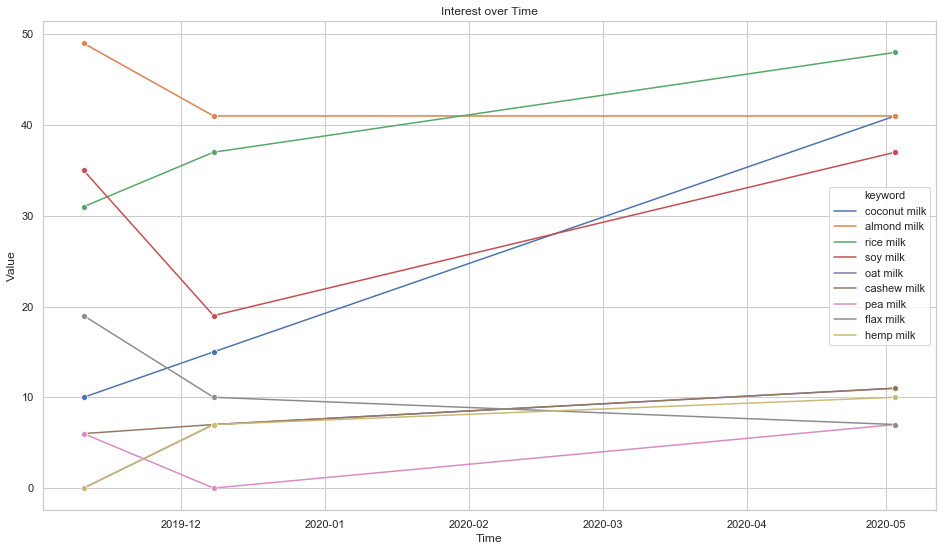

In [145]:
# small
IoT_plot(kwlist1,kwlist2,category,geo_location,time_frame)

        date  coconut milk  almond milk  rice milk  soy milk  oat milk
0 2019-06-02            20           43         27        20         0
1 2019-06-09            40           54         43        10         0
2 2019-06-16            27           23         30        17         0
3 2019-06-23            27           43         56        37        13
4 2019-06-30            13           36         27        23         7
        date  almond milk  cashew milk  pea milk  flax milk  hemp milk
0 2019-06-02           41            6         6          6          6
1 2019-06-09           49            6         0          6          0
2 2019-06-16           18           18         0         12          6
3 2019-06-23           42            6         0          0          0
4 2019-06-30           39            0         6          6          0
Wall time: 247 ms


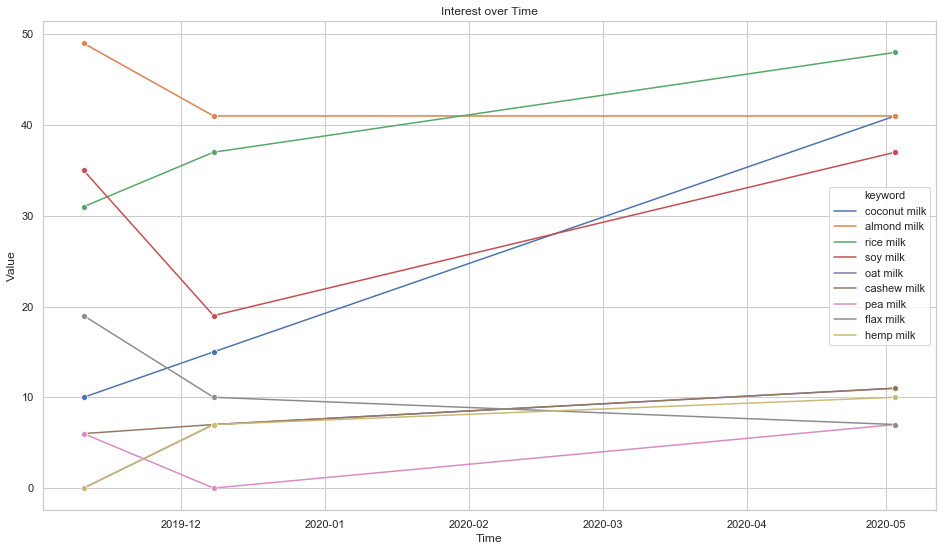

In [146]:
# capital
IoT_plot(kwlist1,kwlist2,category,geo_location,time_frame)

#### Single set input

In [147]:
# Function Google trends data Api
def googleTrendsApi_IoT(keywords,user_cat,user_geo,user_timeframe):
    pytrend = TrendReq()
    pytrend.build_payload(kw_list=keywords,cat=user_cat,timeframe = user_timeframe,geo = user_geo)
        
    # Interest Over Time
    interest_over_time_df = pytrend.interest_over_time().reset_index()
    interest_over_time_df = interest_over_time_df.drop(['isPartial'],axis=1)
    interest_over_time_df.head()
    
    return interest_over_time_df

In [148]:
# Function to plot IoT
def googleTrendsCharts_IoT(IoT,kwlist):
    data1=IoT.melt(id_vars =['date'], value_vars = kwlist,  
    var_name ='keyword', value_name ='IOT') 
    data1 = data1[pd.notnull(data1['IOT'])]
    
    # Initialize the matplotlib figure
    f, axs = plt.subplots(figsize=(16, 9))
    
    # Plot
    sns.set_color_codes("pastel")
    sns.lineplot(x="date", y="IOT", hue='keyword',marker='o',data=data1).set(title = 'Interest over Time', xlabel = 'Time', ylabel = 'Value' )

In [149]:
kwlist1 = ['almond milk']
category = 71
geo_location = 'IN'
time_frame = 'today 12-m'

In [150]:
def IoT_plot(kwlist1,category,geo_location,time_frame):
    IoT1 = googleTrendsApi_IoT(kwlist1,category,geo_location,time_frame)
    %time googleTrendsCharts_IoT(IoT1,kwlist1)

Wall time: 42.9 ms


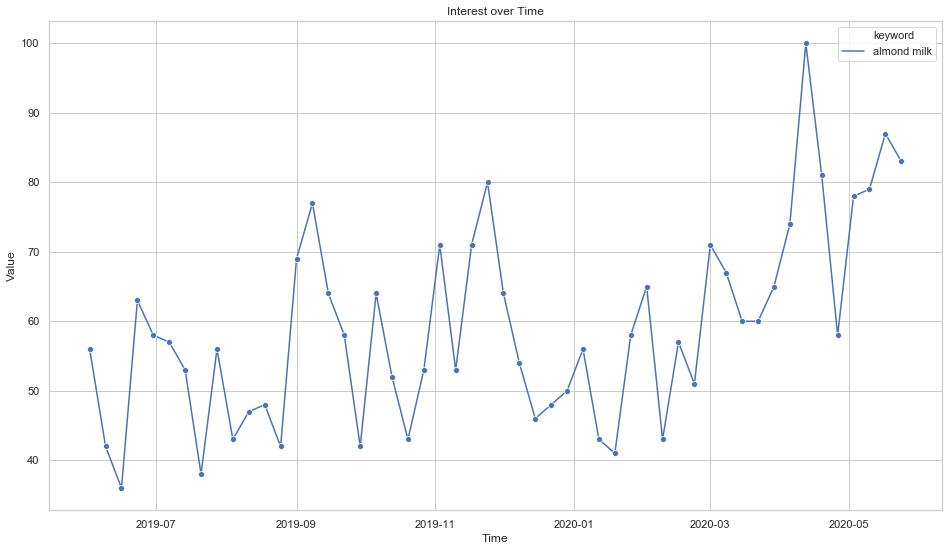

In [151]:
IoT_plot(kwlist1,category,geo_location,time_frame)

### Using scaling for 5+ keywords

In [231]:
def keywords_more_than_5(searches,string):
    i = 0
    middle_brand = ""
    interest_over_time_df = {}
    count = 0
    flag=0
    while i < len(searches) :
        kw = []
        if i < len(searches):
            kw.append(searches[i])
        if i + 1 < len(searches):
            kw.append(searches[i + 1])
        if i + 2 < len(searches):
            kw.append(searches[i + 2])
        if i + 3 < len(searches):
            kw.append(searches[i + 3])
        if i == 0:
            if i + 4 < len(searches):
                kw.append(searches[i + 4])
            flag=1
            i=i+5
        else:
            flag=0
            kw.append(middle_brand[0])
            prev_middle_brand=middle_brand[1]
            i = i + 4
        interest_over_time_df[count] = list_pytrends(kw)
        if kw[len(kw)-2]!=searches[len(searches)-1]:
            middle_brand = middle_product(interest_over_time_df[count])
            print(middle_brand)

        interest_over_time_df[count].loc['mean'] = interest_over_time_df[count].mean(0)
        if flag==1:
            interest_over_time_df[count].loc['scaling']=interest_over_time_df[count].mean(0)
        else:
            interest_over_time_df[count].loc['scaling']=scaling_func(interest_over_time_df[count],prev_middle_brand)
        count += 1
    df = pd.concat(interest_over_time_df, axis=1)
    df.columns = df.columns.droplevel(0)
    create_excel(df,searches,string,"")
    #create_graphs(df,string)
    scaling_list=df.values[-1].tolist()
    keyword_list=list(df.columns.values)
    dict={}
    keyword_list=keyword_list[1:]
    scaling_list=scaling_list[1:]
    for i in range(0,len(keyword_list)):
        dict[keyword_list[i]]=scaling_list[i]
    x = {k: v for k, v in sorted(dict.items(), key=lambda item: item[1],reverse=True)}
    list_x=[]
    for key in x:
        list_x.append(key)
    
    keywords_less_than_5(list_x[0:5],string)

def middle_product(interest_over_time_df):
    avg_list = interest_over_time_df.mean(0)

    x = {k: v for k, v in sorted(avg_list.items(), key=lambda item: item[1])}
    j = 0
    for key in x:
        if (j == 2):
            middle_brand = (key)
            avg_value=x[key]
        j = j + 1

    return middle_brand,avg_value


def scaling_func(df,avg_val_prev):
    scaling_list=df.values[-1].tolist()
    common=scaling_list[len(scaling_list)-1]
    list=[]
    for avg_value in scaling_list:
        avg_value=avg_value*avg_val_prev/common
        list.append(avg_value)
    return list

def keywords_less_than_5(name_list,string):
    interest_over_time_df = list_pytrends(name_list)
    create_graphs(interest_over_time_df)
    create_excel(interest_over_time_df,name_list,"","")

def create_graphs(interest_over_time_df,string):
    sns.set(color_codes=False)
    ax = interest_over_time_df.plot.line(figsize=(9, 6),title="Interest Over Time")
    ax.set_xlabel('Date')
    ax.set_ylabel('Trends Index')
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.figure.savefig(string+'.png')

def create_excel(interest_over_time_df,name_list,string,final):
    interest_over_time_df.reset_index(level=0, inplace=True)
    pd.melt(interest_over_time_df, id_vars='date', value_vars=name_list)
    interest_over_time_df.to_excel(string+'_'+final+'.xlsx')

In [232]:
kw = ['coconut milk','almond milk','rose milk','soy milk','oat milk','cashew milk','pea milk','flax milk','hemp milk']
keywords_more_than_5(kw,'j')

('soy milk', 14.596153846153847)


TypeError: create_graphs() missing 1 required positional argument: 'string'